In [8]:
import pandas as pd

In [50]:
data=pd.read_csv(r"C:\Users\Vigan\Downloads\NBA Player Injury Stats(1951 - 2023).csv")

In [29]:
data.head()

,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
0,0,1951-12-25,Bullets,NaN,Don Barksdale,placed on IL
1,1,1952-12-26,Knicks,NaN,Max Zaslofsky,placed on IL with torn side muscle
2,2,1956-12-29,Knicks,NaN,Jim Baechtold,placed on inactive list
3,3,1959-01-16,Lakers,NaN,Elgin Baylor,player refused to play after being denied a ro...
4,4,1961-11-26,Lakers,NaN,Elgin Baylor,player reported for military duty


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data.shape


(37667, 6)

In [31]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37667 entries, 0 to 37666
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    37667 non-null  int64 
 1   Date          37667 non-null  object
 2   Team          37667 non-null  object
 3   Acquired      17623 non-null  object
 4   Relinquished  20044 non-null  object
 5   Notes         37667 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.7+ MB
None


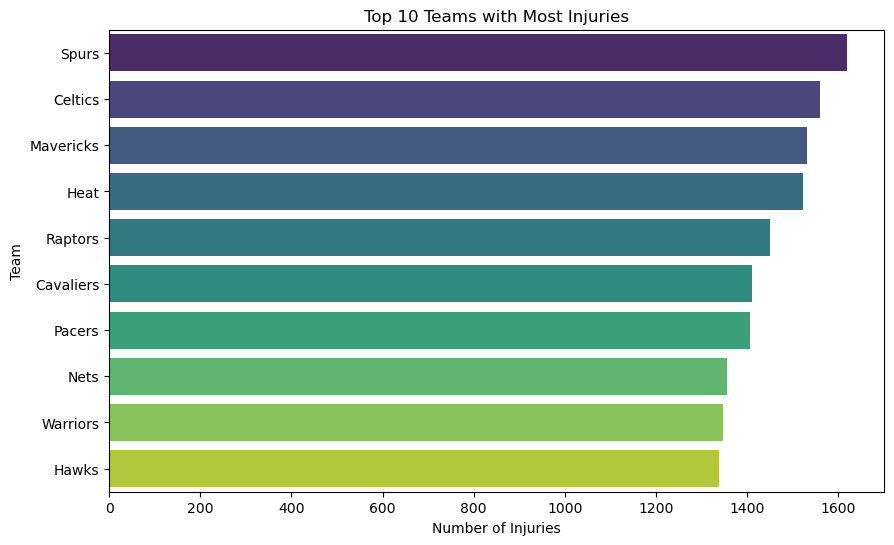

In [32]:
team_count = data['Team'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=team_count.values, y=team_count.index, palette="viridis")
plt.title("Top 10 Teams with Most Injuries")
plt.xlabel("Number of Injuries")
plt.ylabel("Team")
plt.show()

In [33]:
data = data.drop('Acquired', axis=1)

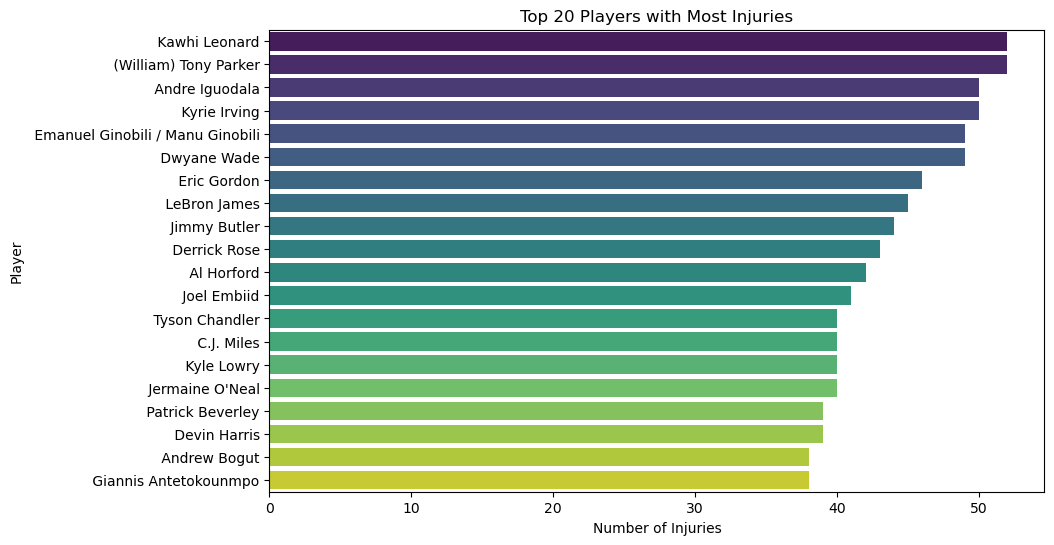

In [34]:
player_count = data['Relinquished'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=player_count.values, y=player_count.index, palette="viridis")
plt.title("Top 20 Players with Most Injuries")
plt.xlabel("Number of Injuries")
plt.ylabel("Player")
plt.show()

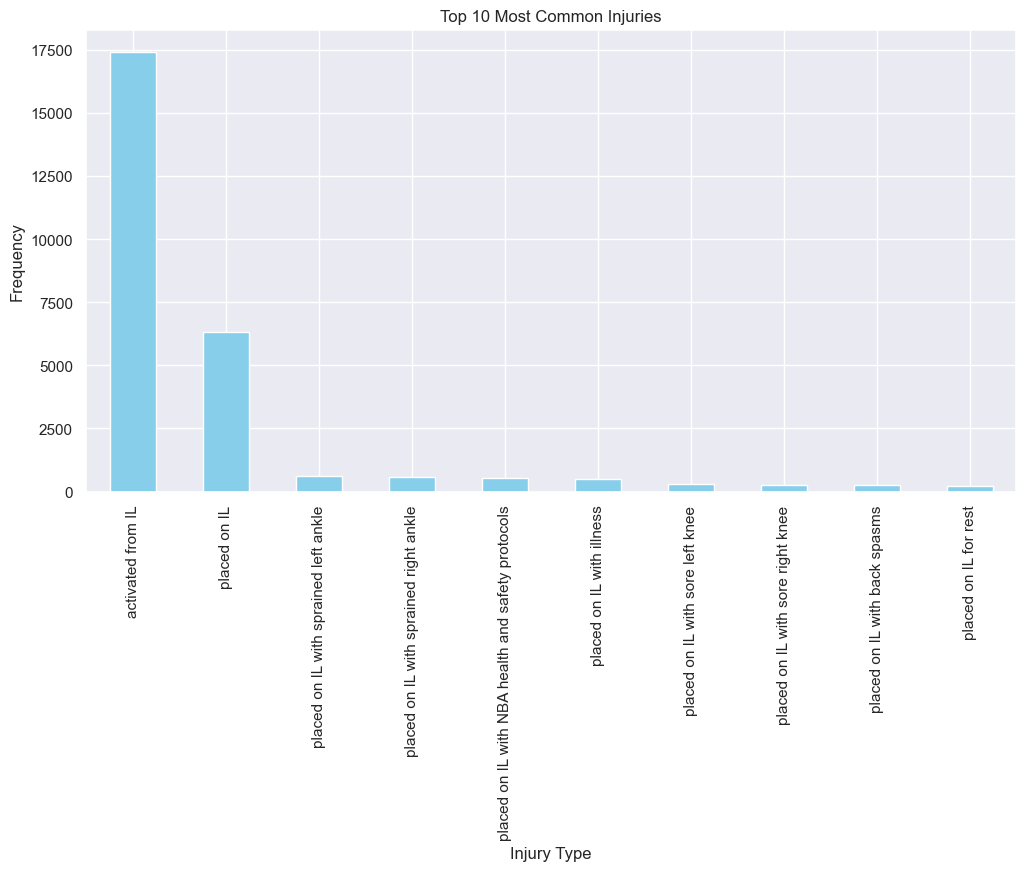

In [58]:
top_n = 10
top_injuries = data['Notes'].value_counts().nlargest(top_n)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_injuries.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Most Common Injuries')
plt.xlabel('Injury Type')
plt.ylabel('Frequency')
plt.show()

In [61]:
pip install wordcloud matplotlib seaborn


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 939.4 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


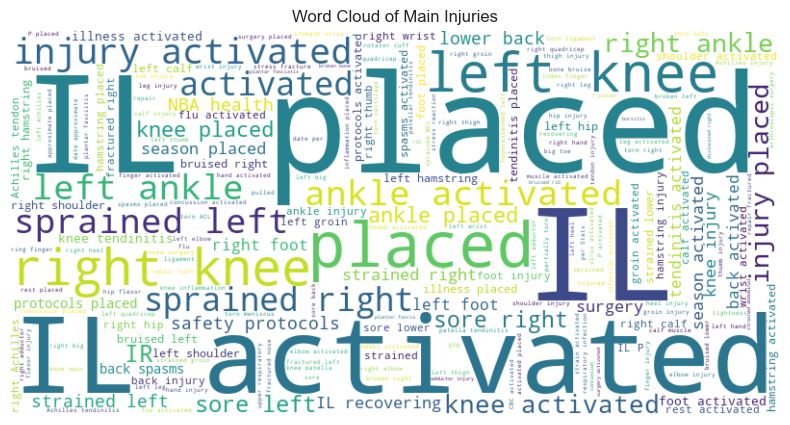

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Main injuries in Notes column
notes_text = ' '.join(data['Notes'].dropna())

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(notes_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Main Injuries')
plt.axis('off')
plt.show()